<a href="https://colab.research.google.com/github/KezhenLi/Homework3/blob/main/homework3.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

from numpy import ones,copy,cos,sin,tan,pi,linspace,sqrt
from pylab import plot, show, xlabel, ylabel,title


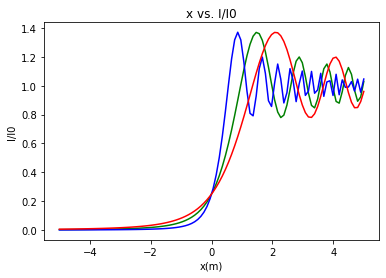

In [13]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def integralCu(a, b, N):
    t, w = gaussxwab(N, a, b)
    integral = 0.0
    for i in range(N):
        integral += w[i] * cos(0.5 * pi * t[i] ** 2)
    return integral

def integralSu(a, b, N):
    t, w = gaussxwab(N, a, b)
    integral = 0.0
    for i in range(N):
        integral += w[i] * sin(0.5 * pi * t[i] ** 2)
    return integral

def I(x, z):
    u = x * sqrt(2 / (1 * z))
    N = 50  
    return 1 / 8 * ((2 * integralCu(0, u, N)
 + 1) ** 2 + (2 * integralSu(0, u, N) + 1) ** 2)

x = linspace(-5, 5, 100)
y1 = []
y2 = []
y3 = []
for i in range(100):
    y1.append(I(x[i], 3))
    y2.append(I(x[i], 1))
    y3.append(I(x[i], 6))
plot(x, y1, 'g')
plot(x, y2, 'b')
plot(x, y3, 'r')
xlabel("x(m)")
ylabel("I/I0")
title("x vs. I/I0")
show()

#I/I0 is near to 0 when x increases from -5 to 0 and increases rapidly after x=0.
#I/Io acts as an damped oscillation when x increases from 0 to 5, the dampings of 
#different z values: z=6 > z=3 > z+1